<a href="https://colab.research.google.com/github/Raiyan-DEA/Dataframe_content/blob/main/3_Data_Analysts_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/customer_transaction_data.csv')

# Preview the data
print(df.head(10))

   CustomerID  MonthlyCharges  TenureMonths Churned ChargeBucket
0           1           79.93             2      No       Medium
1           2           67.23            17      No       Medium
2           3           82.95            33      No       Medium
3           4          100.46             9      No         High
4           5           65.32            43      No       Medium
5           6           65.32            48      No       Medium
6           7          101.58            39      No         High
7           8           85.35            42     Yes       Medium
8           9           60.61            26      No       Medium
9          10           80.85            50      No       Medium


In [16]:
# Central Tendency Measures
mean = df['MonthlyCharges'].mean()
median = df['MonthlyCharges'].median()
mode = df['MonthlyCharges'].mode()[0]  # mode() returns a Series

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")

# Spread / Dispersion Measures
std_dev = df['MonthlyCharges'].std()
variance = df['MonthlyCharges'].var()
range_val = df['MonthlyCharges'].max() - df['MonthlyCharges'].min()
iqr = df['MonthlyCharges'].quantile(0.75) - df['MonthlyCharges'].quantile(0.25)

print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Range: {range_val:.2f}")
print(f"IQR (Interquartile Range): {iqr:.2f}")


Mean: 72.91
Median: 71.18
Mode: 65.32
Standard Deviation: 31.83
Variance: 1012.99
Range: 323.82
IQR (Interquartile Range): 25.96


In [ ]:
df.describe()

# Skewness and Kurtosis
print("Skewness:\n", df.skew(numeric_only=True))
print("\n Kurtosis:\n", df.kurtosis(numeric_only=True))

# Visualize distributions
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


In [17]:
print(df)

     CustomerID  MonthlyCharges  TenureMonths Churned ChargeBucket
0             1           79.93             2      No       Medium
1             2           67.23            17      No       Medium
2             3           82.95            33      No       Medium
3             4          100.46             9      No         High
4             5           65.32            43      No       Medium
..          ...             ...           ...     ...          ...
195         196           77.71             5     Yes       Medium
196         197           52.32            29     Yes          Low
197         198           73.07            37      No       Medium
198         199           71.16            38     Yes       Medium
199         200           47.14             8      No          Low

[200 rows x 5 columns]


In [20]:
# IQR Method
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
outliers_iqr = df[(df['MonthlyCharges'] < (Q1 - 1.7 * IQR)) | (df['MonthlyCharges'] > (Q3 + 1.7 * IQR))]
print(f"{outliers_iqr}")
print(f"Outliers using IQR method: {len(outliers_iqr)}")

# Z-Score Method
from scipy.stats import zscore
df['z_score'] = zscore(df['MonthlyCharges'])
outliers_z = df[df['z_score'].abs() > 3]
print(f"Outliers using Z-score method: {len(outliers_z)}")


     CustomerID  MonthlyCharges  TenureMonths Churned ChargeBucket   z_score
24           25          177.33            66     Yes    Very High  3.289196
43           44          191.94            53      No    Very High  3.749384
85           86          179.88            62     Yes    Very High  3.369517
125         126          341.43            46      No    Very High  8.458046
144         145          225.60            23     Yes    Very High  4.809613
Outliers using IQR method: 5
Outliers using Z-score method: 5


In [ ]:
# P(Churned = Yes)
p_churn = (df['Churned'] == 'Yes').mean()
print(f"P(Churned = Yes): {p_churn:.2f}")

# # Conditional Probability: P(Churned = Yes | MonthlyCharges > 100)
# high_charge = df['MonthlyCharges'] > 100
# p_churn_given_high_charge = ((df['Churned'] == 'Yes') & high_charge).sum() / high_charge.sum()
# print(f"P(Churned | MonthlyCharges > 100): {p_churn_given_high_charge:.2f}")


In [ ]:
# Churn Rate by Monthly Charge Range
df['ChargeBucket'] = pd.cut(df['MonthlyCharges'], bins=[0, 60, 90, 120, df['MonthlyCharges'].max()])
churn_by_bucket = df.groupby('ChargeBucket')['Churned'].value_counts(normalize=True).unstack()

churn_by_bucket.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Monthly Charge Bucket')
plt.ylabel('Proportion')
plt.show()


In [ ]:
sample_means = [df['MonthlyCharges'].sample(30).mean() for _ in range(1000)]
print(sample_means)

# sns.histplot(sample_means, kde=True)
# plt.title("Sampling Distribution of the Mean (CLT)")
# plt.xlabel("Sample Mean of Monthly Charges")
# plt.show()

Correlation Matrix:
                MonthlyCharges  TenureMonths
MonthlyCharges        1.000000      0.028376
TenureMonths          0.028376      1.000000


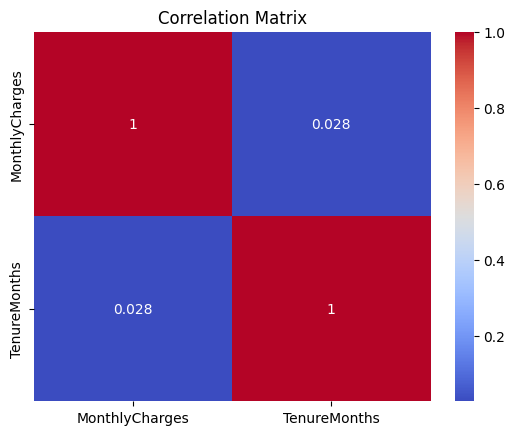

In [21]:
correlation = df[['MonthlyCharges', 'TenureMonths']].corr()
print("Correlation Matrix:")
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from scipy.stats import ttest_ind

churned = df[df['Churned'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churned'] == 'No']['MonthlyCharges']

t_stat, p_value = ttest_ind(churned, not_churned)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Statistically significant difference in charges between churned and not churned.")
else:
    print("Result: No significant difference.")


In [ ]:
# Boxplot + Histogram
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
sns.boxplot(x=df['MonthlyCharges'], ax=ax[0], color='orange')
sns.histplot(df['MonthlyCharges'], kde=True, ax=ax[1], color='blue')
plt.tight_layout()
plt.show()


In [ ]:
df['ChargeBucket'] = pd.cut(df['MonthlyCharges'], bins=[0, 60, 90, 120, df['MonthlyCharges'].max()],
                            labels=['Low', 'Medium', 'High', 'Very High'])


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.histplot(df['ChargeBucket'], kde=True, color='blue')
plt.show()